# Project 2 -  Ames Iowa: Alternative to the Boston Housing Data Set

#### By: Najiha Boosra: [Github]()

## Problem Statement

For creating a regression model based on the Ames Housing Dataset. This model will predict the price of a house at sale.In this project, in particular, we will likely find that EDA, data cleaning,exploratory visualizations and finding RMSE, r^2 as metric will constantly feed back into each other. If the purpose in building the model is simply to allow a typical buyer or real estate agent to sit down and estimate the selling price of a house, such transformations may be unnecessary or inappropriate for the task at hand.
We strongly make this point in the situation where data are being analyzed for research purposes that will be shared with a larger audience and the primary and secondary stakeholders.


## Executive Summary

## Table of Contents

- **[Loading Libraries](#Data-import-read)**  

- **[Data Cleaning](#Data-Cleaning)**    

- **[EDA](#EDA-Exploratory-Data-Analysis)**  

- **[Modeling](#Modeling-Train-Test_Split-Baseline-Model)**  

- **[Model Prep:Scaling](#Linear-Regression-Ridge-Lasso)**  

- **[Model Selection & Evaluation](#Model-selection-Model-Evaluation)**      

- **[Conclusions and Recommendations](#Conclusions-and-Recommendations)**  

- **[References](#Reference)**   

- **[Kaggle Submission](#kaggle-submission)**

## Loading Libraries

In [684]:
import warnings
warnings.filterwarnings("ignore") 
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


%matplotlib inline
RANDOM_STATE = 90210

Loading Data

In [743]:
ames = pd.read_csv("../datasets/train.csv")                   

In [744]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


 Shape of the dataset

In [745]:
ames.shape

(2051, 81)

## Data Cleaning

#### Checking data type

In [746]:
ames.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [747]:
ames.shape

(2051, 81)

#### getting nulls

In [748]:
#listing null values columns
features_null = ames.columns[ames.isna().any().tolist()]


ames[features_null].isna().sum()

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

#### working with most null values

In [749]:
## Credit goes to Max Mazel

#Create lists for each null fill type
fill_None = ['col1','col2']
...
...




#Create dicts with the value you want to fill null with
none_dict = {k: 'None' for k in fill_None}
...
...


clean_dict_list = [none_dict, ..., ...]


for i in clean_dict_list:
    ames.fillna(value = i, inplace = True)

In [750]:
ames.isnull().sum().sum()

0

In [751]:
ames.describe()

,Id,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,10065.208191,6.112140,5.562165,1971.708922,1984.190151,1164.488055,329.329108,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,6742.488909,1.426271,1.104497,30.177889,21.036250,396.446923,425.671046,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,879.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,1093.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,1405.000000,692.500000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,5095.000000,1862.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


## EDA

In [752]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,Ellipsis,13517,Pave,Ellipsis,IR1,Lvl,...,0,0,Ellipsis,Ellipsis,Ellipsis,0,3,2010,WD,130500
1,544,531379050,60,RL,43,11492,Pave,Ellipsis,IR1,Lvl,...,0,0,Ellipsis,Ellipsis,Ellipsis,0,4,2009,WD,220000
2,153,535304180,20,RL,68,7922,Pave,Ellipsis,Reg,Lvl,...,0,0,Ellipsis,Ellipsis,Ellipsis,0,1,2010,WD,109000
3,318,916386060,60,RL,73,9802,Pave,Ellipsis,Reg,Lvl,...,0,0,Ellipsis,Ellipsis,Ellipsis,0,4,2010,WD,174000
4,255,906425045,50,RL,82,14235,Pave,Ellipsis,IR1,Lvl,...,0,0,Ellipsis,Ellipsis,Ellipsis,0,3,2010,WD,138500


Deal with outliers

In [753]:
ames[ames['SalePrice'] < 30000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
183,1554,910251050,20,A (agr),80,14584,Pave,Ellipsis,Reg,Low,...,0,0,Ellipsis,Ellipsis,Ellipsis,0,2,2008,WD,13100
1628,182,902207130,30,RM,68,9656,Pave,Ellipsis,Reg,Lvl,...,0,0,Ellipsis,Ellipsis,Ellipsis,0,6,2010,WD,12789


In [754]:
#droping low sale prices
ames.drop(index = 1554, inplace = True)
ames.drop(index = 182, inplace = True)

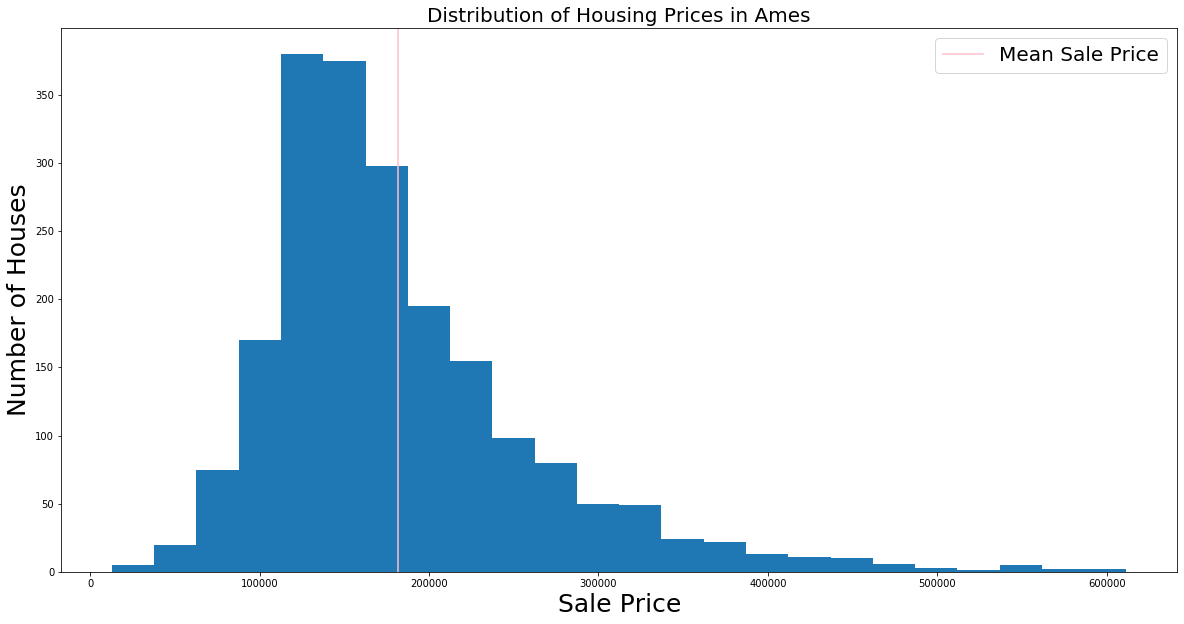

In [755]:
plt.figure(figsize=(20, 10))
zx = plt.gca()

plt.hist(ames.SalePrice, bins=24)
plt.title("Distribution of Housing Prices in Ames", fontsize=20)

plt.xlabel('Sale Price', fontsize=25)
plt.ylabel('Number of Houses', fontsize=25)

plt.axvline(ames.SalePrice.mean(), color='pink', label='Mean Sale Price')
plt.legend(fontsize=20);

The SalePrice values are right-skewed,so our model is likely to underpredict when it's incorrect. 

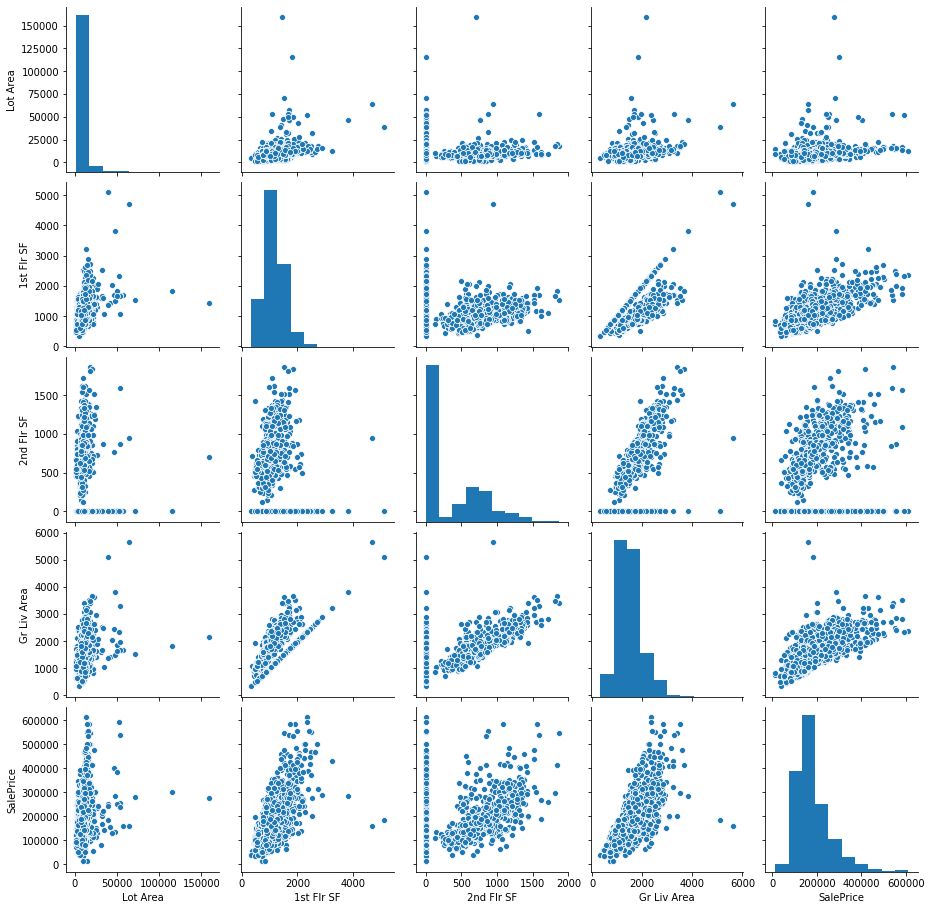

In [756]:
sns.pairplot(ames[['Lot Frontage', 'Lot Area', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'SalePrice']]);

 I picked some continuous variables to create this pairplot. Here like the sale price is right sweked as like the others too. And there is some outliers.let  keep all the outliers because it has effects in sale price. for 2nd flr SF there is also  dots in 0 which means many houses don't have 2nd floor sqrt feet.

In [792]:
ames[ames['Gr Liv Area'] > 4000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
960,1499,908154235,60,RL,313,63887,Pave,Ellipsis,IR3,Bnk,...,0,0,0,0,0,0,0,0,0,0
1885,2181,908154195,20,RL,128,39290,Pave,Ellipsis,IR1,Bnk,...,0,1,0,0,0,0,0,0,0,0


In [793]:
ames = ames[ames['Gr Liv Area'] < 4000]

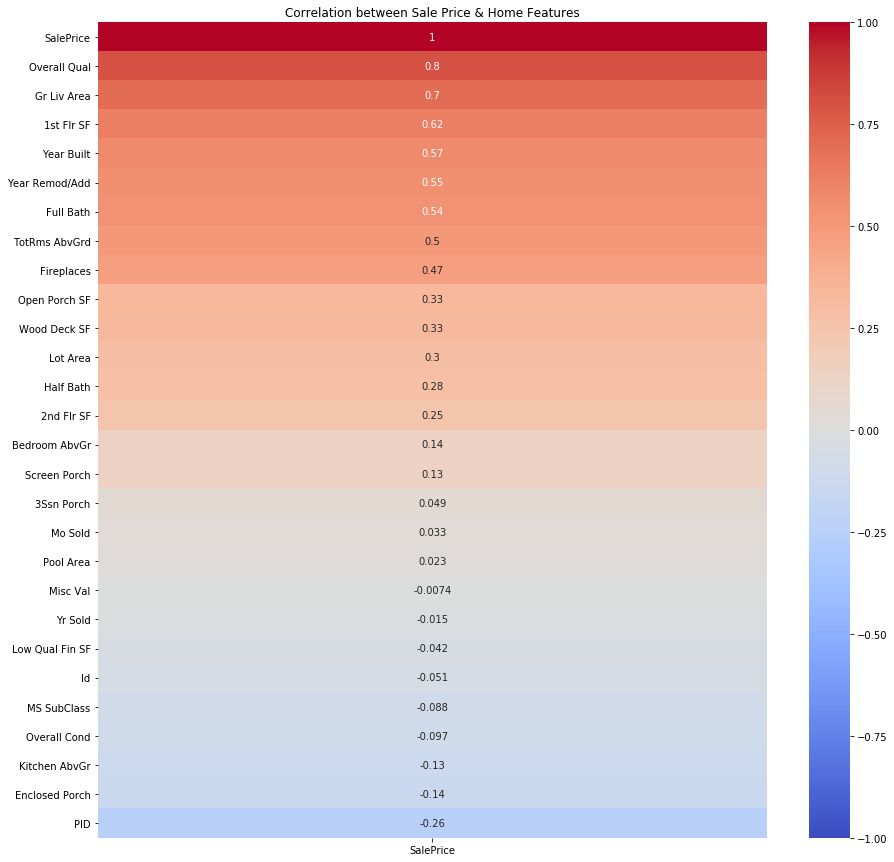

In [757]:
# Mathew Malone help out to solve

plt.figure(figsize=(15,15))
sns.heatmap(ames.corr()[['SalePrice']].sort_values('SalePrice', ascending = False), annot=True, cmap='coolwarm', vmin=-1, vmax=1);
plt.title("Correlation between Sale Price & Home Features");

Converting Nominal Classes to integer

In [758]:
ames['Neighborhood'].unique()

array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
       'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
       'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',
       'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
       'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object)

In [759]:
pd.get_dummies(ames['Neighborhood']).head()

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [760]:
ames = pd.get_dummies(data = ames, columns = ['Neighborhood', 'House Style', 'Roof Style', 'Roof Matl', 'Heating'], drop_first= True)

In [761]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,109,533352170,60,RL,Ellipsis,13517,Pave,Ellipsis,IR1,Lvl,...,0,1,0,0,0,0,0,0,0,0
1,544,531379050,60,RL,43,11492,Pave,Ellipsis,IR1,Lvl,...,0,1,0,0,0,0,0,0,0,0
2,153,535304180,20,RL,68,7922,Pave,Ellipsis,Reg,Lvl,...,0,1,0,0,0,0,0,0,0,0
3,318,916386060,60,RL,73,9802,Pave,Ellipsis,Reg,Lvl,...,0,1,0,0,0,0,0,0,0,0
4,255,906425045,50,RL,82,14235,Pave,Ellipsis,IR1,Lvl,...,0,1,0,0,0,0,0,0,0,0


In [762]:
ames.shape

(2049, 124)

## Modeling

#### Train-Test-Split

Every numerical column (that is not our target) will be used as a feature.
The SalePrice column is our label.
In the cell below, we will create X and y variables.
Then we'll use cross_val_score to get a baseline  𝑅^2
  for our model.

In [794]:
features = [col for col in ames._get_numeric_data().columns if col != 'SalePrice']
X = ames[features].drop(columns = ['Id', "PID"])
y = ames['SalePrice']

In [795]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= RANDOM_STATE)

#### Baseline Model

Since this is a linear regression problem (and we'll be using RMSE and R^2 as our metric), the baseline model is to predicted the most frequently occuring target class.

## Model Prep: Scaling
---

Since we're using `Linear`, `Lasso` and `Ridge`, we'll want to scale our features. In the cell below, fitting a `StandardScaler` to `X_train` and use it to transform both `X_train` and `X_test`.


In [821]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

####  Linear Regression

instantiate model

In [797]:
lr = LinearRegression()

fit model

In [798]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

train score

In [799]:
lr.score(X_train, y_train)

0.8818608375346746

test score

In [800]:
lr.score(X_test, y_test) 

0.8665038680997968

cross_val_score to evaluate 

In [801]:
cross_val_score(lr, X, y, cv =5).mean()

0.8646193708099291

#### Ridge

In [802]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [803]:
ridge.fit(X_train_sc, y_train);

In [804]:
ridge.score(X_train_sc, y_train)

0.8818019929009436

In [805]:
ridge.score(X_test_sc, y_test)

0.8665764458083615

#### Lasso

In [806]:
lasso = LassoCV(n_alphas=200)

In [807]:
lasso.fit(X_train_sc, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [808]:
lasso.score(X_train_sc, y_train)

0.8790174828971837

In [809]:
lasso.score(X_test_sc, y_test)

0.8680593436346173

## Model Selection & Evaluation

Linear and Ridge are returning much better score than Lasso score. and they are reducing or eliminating the effect of collinear features. Since ridge model is slightly better so we will proceed with it.

In [810]:
pred = ridge.predict(X_test_sc)

In [811]:
r2_score(y_test, pred)

0.8665764458083615

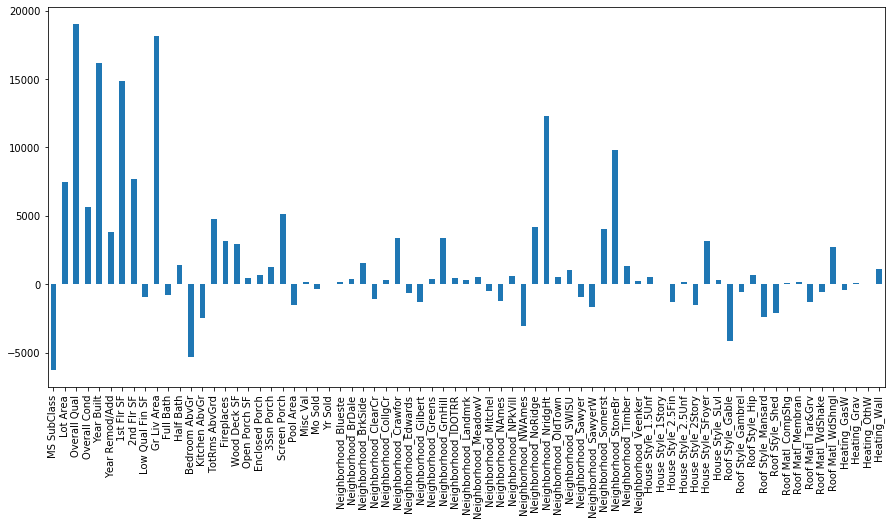

In [812]:
pd.Series(ridge.coef_, index = X.columns).plot.bar(figsize=(15, 7));

It's shows some feature like Ms subclass,bedroom kitchen abvrge, pool area has such as outsized negative impact on price in this model.

In [813]:
residuals = y_test - pred

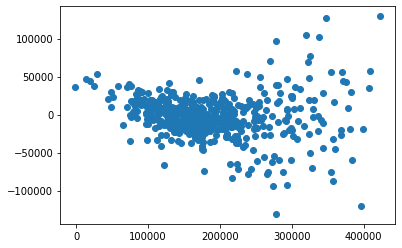

In [814]:
plt.scatter(pred, residuals);

In [815]:
(mean_squared_error(y_test, pred)) ** .5

28784.824217081845

This is a pretty good RMSE score. It means that on average the model will predict within $28784.82 of the actual target. Now we will plot those predictions against the actual prices for those properties so the strength of the model can be judged visually.

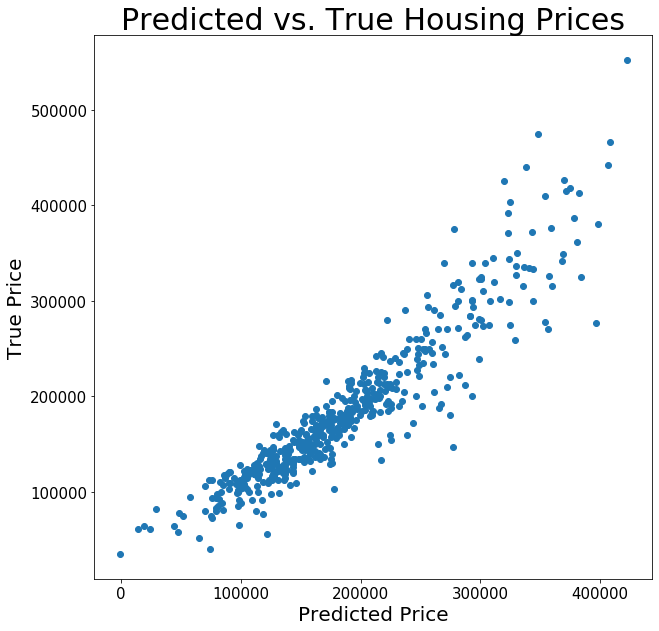

In [820]:
plt.figure(figsize=(10,10))

plt.scatter(pred, y_test, label=None)

plt.title('Predicted vs. True Housing Prices', fontsize=30)
plt.xlabel('Predicted Price', fontsize=20)
plt.ylabel('True Price', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);



Here predicted price and True price are almost accurate. through there is some differences but maximum time predicted price is near to the true price. 

## Conclusion & Recommendations

Our analysis began with a relatively clean dataset of over 2,000 home sales in Ames, IA between 2007 and 2010. We applied a linear regression model which highlighted the properties above-ground square footage as the most heavily-weighted feature in predicting sale price. Basement square footage, the build year, an overall quality rating of “excellent,” and square footage of finished basement rounded out the most influential features. The model currently has an r2 score of .0.8665764 and an RMSE of 28784.8242.

## References

Review the [data description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

-----

# Kaggle Submission



In [709]:
# Load validation set
val = pd.read_csv("../datasets/test.csv") 

In [710]:
val.shape

(878, 80)

In [711]:
val.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [713]:
val.isnull().sum().sort_values()

Id                0
Bsmt Unf SF       0
Yr Sold           0
Heating           0
Heating QC        0
               ... 
Fireplace Qu    422
Fence           706
Alley           820
Misc Feature    837
Pool QC         874
Length: 80, dtype: int64

In [714]:
#Create lists for each null fill type
fill_None = ['col1','col2']
...
...




#Create dicts with the value you want to fill null with
none_dict = {k: 'None' for k in fill_None}
...
...


clean_dict_list = [none_dict, ..., ...]


for i in clean_dict_list:
    val.fillna(value = i, inplace = True)

checking sum of null values

In [715]:
val.isnull().sum()

Id              0
PID             0
MS SubClass     0
MS Zoning       0
Lot Frontage    0
               ..
Misc Feature    0
Misc Val        0
Mo Sold         0
Yr Sold         0
Sale Type       0
Length: 80, dtype: int64

In [716]:
val.describe()

,Id,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,878.000000,8.780000e+02,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,...,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1444.749431,7.162867e+08,58.268793,10307.033030,6.050114,5.566059,1970.492027,1984.417995,441.328018,53.896355,...,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740
std,850.838263,1.889103e+08,42.235407,10002.674602,1.369065,1.128903,30.395895,20.450725,438.457329,178.632355,...,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861
min,2.000000,5.263021e+08,20.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.250000,5.284841e+08,20.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1433.000000,5.354542e+08,50.000000,9446.000000,6.000000,5.000000,1972.000000,1992.000000,373.000000,0.000000,...,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.500000,9.071904e+08,70.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,734.750000,0.000000,...,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,2288.000000,1526.000000,...,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


getting dummies

In [719]:
val_dummies = pd.get_dummies(val)

In [720]:
val_dummies.head()

,Id,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,2658,902301120,190,9142,6,8,1910,1950,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2718,905108090,90,9662,5,4,1977,1977,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2414,528218130,60,17104,7,5,2006,2006,554,0,...,0,0,0,0,0,0,1,0,0,0
3,1989,902207150,30,8520,5,6,1923,2006,0,0,...,0,0,0,0,0,0,0,0,0,1
4,625,535105100,20,9500,6,5,1963,1963,609,0,...,0,0,0,0,0,0,0,0,0,1


In [692]:
val_dummies.shape

Now we'll create a set containing the names of the training columns that don't appear in the validation dataframe

In [721]:
set(X_train).difference(val_dummies)

{'Alley',
 'Bldg Type',
 'Bsmt Cond',
 'Bsmt Exposure',
 'Bsmt Qual',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Central Air',
 'Condition 1',
 'Condition 2',
 'Electrical',
 'Exter Cond',
 'Exter Qual',
 'Exterior 1st',
 'Exterior 2nd',
 'Fence',
 'Fireplace Qu',
 'Foundation',
 'Functional',
 'Garage Cond',
 'Garage Finish',
 'Garage Qual',
 'Garage Type',
 'Garage Yr Blt',
 'Heating',
 'Heating QC',
 'House Style',
 'Kitchen Qual',
 'Land Contour',
 'Land Slope',
 'Lot Config',
 'Lot Frontage',
 'Lot Shape',
 'MS Zoning',
 'Mas Vnr Area',
 'Mas Vnr Type',
 'Misc Feature',
 'Neighborhood',
 'Paved Drive',
 'Pool QC',
 'Roof Matl',
 'Roof Style',
 'Sale Type',
 'Street',
 'Utilities'}

In [824]:
missing_columns = set(X_train).difference(val_dummies)

for column in missing_columns:
    val_dummies[column] = 0

In [825]:
 val_dummies.shape

(878, 722)

In [913]:
ames.shape

(2047, 123)

In [914]:
X_train.shape

(1535, 72)

Now that the validation set contains all of the training set's columns, I'll set it to equal the training set's columns

In [916]:
val_d = val_dummies[X_train.columns]

In [918]:
val_sc = ss.transform(val_d)

Predicting the Validation Dataset

make prediction with model

In [919]:
preds = ridge.predict(val_sc)

We need to submit to Kaggle in the appropriate form of .csv
create prediction Series

In [920]:
preds_col = pd.Series(preds, name = "SalePrice")

# combine with Id
id_col    = val["Id"]
output = pd.concat([id_col, preds_col], axis = 1)
output.head()

,Id,SalePrice
0,2658,125319.693710
1,2718,162223.154979
2,2414,197583.102054
3,1989,106230.400268
4,625,182275.526054


write to csv

In [921]:
output.to_csv("../output/submission.csv", index = False)